增量式PID 初始化

In [1]:
import matplotlib.pyplot as plt

Kp = 0.3   # 比例系数 调整系统的响应速度
Ki = 0.03  # 积分系数 主要解决达不到设定值的静态误差问题
Kd = 0.03  # 微分系数 主要解决积分项I存在导致系统的响应速度问题

goal = 100       # 目标值
output = [0, 0]  # 输出 output[0]现输出 output[0]旧输出
bmq = 0          # 编码器反馈
err = [0, 0]     # 输出误差 err[0]现误差 err[0]旧误差 

IncrementalTime = [0]    # 时间次数
IncrementalOutput = [0]  # 输出

定义增量式PID函数

In [2]:
def IncrementalPID_control():
    global bmq, output
    err[1] = err[0]              # 更新误差
    err[0] = goal - bmq
    # 输出 = 基准 + P * 误差 + I * 累积误差 + D * 误差偏差
    output[0] = output[1] + Kp * err[0] + Ki * (err[0] + err[1]) + Kd * (err[0] - err[1])  # PID调节
    bmq = output[0]              # 假设反馈等于现输出
    output[1] = output[0]        # 记录现输出

迭代运算

In [3]:
for i in range(1, 20):   # 迭代
    IncrementalPID_control()             # 运算一次增量式PID
    IncrementalOutput.append(output[0])  # 添加输出结果
    IncrementalTime.append(i)            # 添加时间次数

图形显示

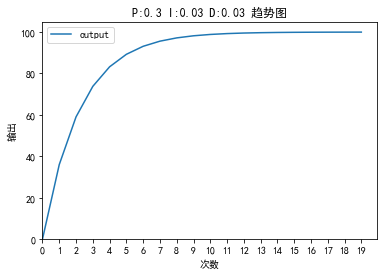

In [4]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']                  # 设置正常显示中文
plt.plot(IncrementalTime, IncrementalOutput, label='output')  # 设置曲线数值
plt.xticks(IncrementalTime)                                   # 设置X轴坐标数值标识
plt.xlim(0)                                                   # 设置X轴的范围（起始坐标）
plt.ylim(0)                                                   # 设置Y轴的范围（起始坐标）
plt.xlabel('次数')                                            # 设置X轴的名字
plt.ylabel('输出')                                            # 设置Y轴的名字
plt.title("P:{0} I:{1} D:{2} 趋势图".format(Kp, Ki, Kd))      # 设置标题
plt.legend()                                                  # 设置图例
plt.show()                                                    # 显示图表